# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.

# Chapter 10: Newton's local method


This notebook replicates the examples from the book, using the python package optimization_book. The numbering of the algorithms, tables and page refer to the book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import optimization_book.unconstrained as unc
import optimization_book.exceptions as excep

### Algorithm 10.1: Newton's local method

Example 5.8: $f(x_1,x_2) = \frac{1}{2} x_1^2 + x_1 \cos(x_2)$

In [2]:
def ex0508(x):
    f = 0.5 * x[0] * x[0] + x[0] * np.cos(x[1])
    g = np.array([x[0] + np.cos(x[1]),
                  -x[0] * np.sin(x[1])])
    H = np.array([[ 1, -np.sin(x[1])],
                  [ -np.sin(x[1]), -x[0] * np.cos(x[1])]])
    return f, g, H   

In [3]:
x0 = np.array([1, 1])
sol, iters, diagnostic = unc.newtonLocal(ex0508, x0, 1e-15)
print(diagnostic)
print(f'Solution: {sol}')

{'Required precision has been reached: 8.354308348422095e-17 <= 1e-15'}
Solution: [1.99048507e-17 1.57079633e+00]


Table 10.1, page 237

In [4]:
title = 'k                  xk        Grad(xk)    ||Grad(xk)||           f(xk)'
print(title)
print(len(title)*'-')
for it in iters:
    print(f'{it[0]}\t'
          f'{it[1][0]:+E}\t'
          f'{it[3][0]:+E}\t'
          f'{np.linalg.norm(it[3]):+E}\t'
          f'{it[2]:+E}')
    print(f'\t{it[1][1]:+E}\t'
          f'{it[3][1]:+E}')

k                  xk        Grad(xk)    ||Grad(xk)||           f(xk)
---------------------------------------------------------------------
0	+1.000000E+00	+1.540302E+00	+1.755165E+00	+1.040302E+00
	+1.000000E+00	-8.414710E-01
1	-2.338451E-01	-2.870770E-02	+2.306654E-01	-2.062862E-02
	+1.364192E+00	+2.288720E-01
2	+1.081438E-02	-3.225248E-03	+1.128405E-02	-9.335440E-05
	+1.584836E+00	-1.081331E-02
3	-2.132377E-06	+9.228287E-07	+2.323498E-06	-4.241334E-12
	+1.570793E+00	+2.132377E-06
4	+1.990485E-17	+8.113719E-17	+8.354308E-17	+1.416922E-33
	+1.570796E+00	-1.990485E-17


Figure 10.1 (a), page 238

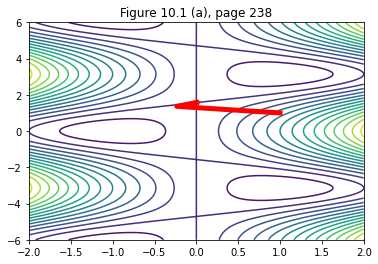

In [5]:
import matplotlib.pyplot as plt
def theFunctionToPlot(x, y):
    return(0.5 * x * x + x * np.cos(y))

xlist = np.linspace(-2.0, 2.0, 1000)
ylist = np.linspace(-6.0, 6.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 15)
xiter = [it[1][0] for it in iters]
yiter = [it[1][1] for it in iters]
plt.title('Figure 10.1 (a), page 238')
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.show()

Figure 10.1 (b), page 238

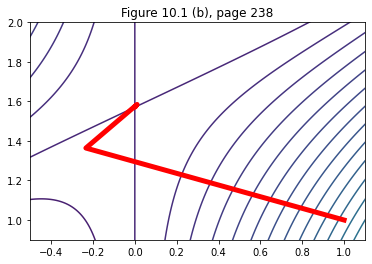

In [6]:
plt.title('Figure 10.1 (b), page 238')
plt.contour(X, Y, Z, 50)
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.xlim(-0.5, 1.1)
plt.ylim(0.9, 2)
plt.show()

### Algorithm 10.2: Newton's local method by quadratic modeling


We test the algorithm on the Rosenbrock function. It is described in Section 11.6 of the book for two variables.  The implementation below involves $n$ variables: \\[f(x) = \sum_{i=1}^{n-1} f_i(x) = \sum_{i=1}^{n-1} 100 (x_{i+1}-x_i^2)^2 + (1-x_i)^2.\\]
The calculation of the derivatives is based on the partial derivatives of the functions $f_i$:
\\[
\begin{array}{rcl}
\partial f_i/\partial x_i&=& -400 x_i (x_{i+1}-x_i^2) - 2(1-x_i), \\\\
\partial f_i/\partial x_{i+1}&=& 200 (x_{i+1}-x_i^2), \\\\
\partial^2 f_i/\partial x^2_i  &=& -400 x_{i+1}+ 1200 x_i^2 + 2, \\\\
\partial^2 f_i/\partial x_i \partial x_{i+1}  &=& -400 x_i^2, \\\\
\partial^2 f_i/\partial x^2_{i+1}  &=& 200. 
\end{array}
\\]


In [7]:
def exRosenbrock(x, derivatives=True):
    n = len(x)
    f = sum(100.0 * (x[i+1]-x[i]**2)**2 + (1.0-x[i])**2 for i in range(n-1))
    if not derivatives:
        return f, None, None
    g = np.zeros(n)
    for i in range(n-1):
        g[i] = g[i] - 400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1-x[i])
        g[i+1] = g[i+1] + 200 * (x[i+1] - x[i]**2)
    H = np.zeros((n, n))
    for i in range(n-1):
        H[[i], [i]] = H[[i], [i]] - 400 * x[i+1] + 1200 * x[i]**2 + 2
        H[[i+1], [i]] = H[[i+1], [i]] - 400 * x[i]
        H[[i], [i+1]] = H[[i], [i+1]] - 400 * x[i]
        H[[i+1], [i+1]] = H[[i+1], [i+1]] + 200
    return f, g, H

In [8]:
x0 = np.array([-1.5, 2])
sol, iters, diagnostic = unc.newtonLocalQuadratic(exRosenbrock, x0, 1e-15)
print(diagnostic)
print(f'Solution: {sol}')

Required precision has been reached: 0.0 <= 1e-15
Solution: [1. 1.]


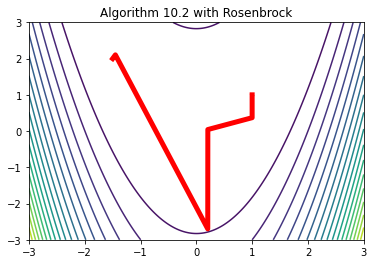

In [9]:
def theFunctionToPlot(x,y):
    return(100 * (y - x * x)**2 + (1 - x)**2)

plt.title('Algorithm 10.2 with Rosenbrock')
xlist = np.linspace(-3.0, 3.0, 1000)
ylist = np.linspace(-3.0, 3.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = theFunctionToPlot(X, Y)
plt.contour(X, Y, Z, 20)
xiter = [it[0][0] for it in iters]
yiter = [it[0][1] for it in iters]
plt.plot(xiter, yiter, linewidth=5, color='r')
plt.show()

We now apply the algorithm on example 5.8. In this case, the algorithm fails to converge, as one hessian is not positive definite. We try first using the direct method to solve the quadratic problem. An exception is triggered. 

In [10]:
x0 = np.array([1.1, 1.1])
try:
    sol, iters, diagnostic = unc.newtonLocalQuadratic(ex0508, x0, 1e-15)
except Exception as e:
    print(f'Exception raised: {e}')

Exception raised: The matrix must be positive definite


If we try with the conjugate gradient method, an error is also triggered. 

In [11]:
try:
    sol, iters, diagnostic = unc.newtonLocalQuadratic(ex0508, x0, 1e-15, True)
except Exception as e:
    print(f'Exception raised: {e}')

Exception raised: The matrix must be positive definite
